# Understanding Repetition Code Graph Decoding

In [1]:
from qiskit import *
import matplotlib.pyplot as plt
import networkx as nx
import random

from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import GraphDecoder
from qiskit.ignis.verification.topological_codes import lookuptable_decoding, postselection_decoding

In [50]:
noise_model = get_noise(0.05,0.05)

In [4]:
d = 4
T = 2
code = RepetitionCode(d,T)

In [5]:
circuits = code.get_circuit_list()
job = execute( circuits, Aer.get_backend('qasm_simulator') )
raw_results = {}
for log in ['0','1']:
    raw_results[log] = job.result().get_counts(log)

In [6]:
raw_results['0']

{'0000 000 000': 1024}

In [7]:
results = code.process_results( raw_results )

In [8]:
results['0']

{'0 0  000 000 000': 1024}

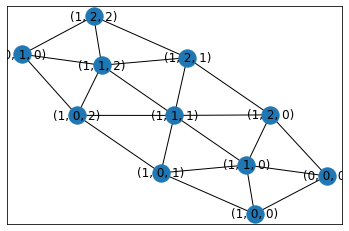

In [38]:
decoder = GraphDecoder(code)
nx.draw_networkx(decoder.S)
plt.plot()
plt.show()

In [10]:

for edge in decoder.S.edges:
    print(edge)

((0, 1, 0), (1, 0, 2))
((0, 1, 0), (1, 1, 2))
((0, 1, 0), (1, 2, 2))
((1, 0, 2), (1, 1, 2))
((1, 0, 2), (1, 0, 1))
((1, 0, 2), (1, 1, 1))
((1, 1, 2), (1, 2, 2))
((1, 1, 2), (1, 1, 1))
((1, 1, 2), (1, 2, 1))
((1, 0, 1), (1, 1, 1))
((1, 0, 1), (1, 0, 0))
((1, 0, 1), (1, 1, 0))
((1, 1, 1), (1, 2, 1))
((1, 1, 1), (1, 1, 0))
((1, 1, 1), (1, 2, 0))
((1, 0, 0), (1, 1, 0))
((1, 0, 0), (0, 0, 0))
((1, 1, 0), (1, 2, 0))
((1, 1, 0), (0, 0, 0))
((0, 0, 0), (1, 2, 0))
((1, 2, 2), (1, 2, 1))
((1, 2, 1), (1, 2, 0))


For edge ((0, 0, 0), (0, 1, 0)) the weight is -4


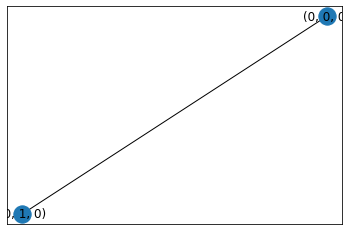

In [35]:
graph = decoder.make_error_graph('0 0  000 000 000')
for edge in graph['0'].edges:
    edge_info = graph['0'][edge[0]][edge[1]]
    print('For edge', edge, 'the weight is',edge_info['weight'])
nx.draw_networkx(graph['0'])
plt.plot()
plt.show()

For edge ((0, 0, 0), (0, 1, 0)) the weight is -4
For edge ((0, 0, 0), (1, 2, 2)) the weight is -3
For edge ((0, 1, 0), (1, 2, 2)) the weight is -1


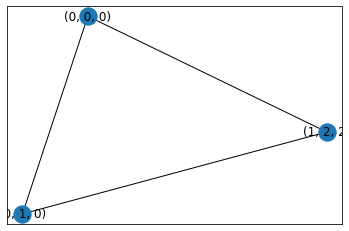

0 0


{'0': 0.0, '1': 0.0}

In [40]:
graph = decoder.make_error_graph('0 1  000 000 001')

for edge in graph['0'].edges:
    edge_info = graph['0'][edge[0]][edge[1]]
    print('For edge', edge, 'the weight is',edge_info['weight'])
    
nx.draw_networkx(graph['0'])
plt.plot()
plt.show()
print(decoder.matching('0 1  000 000 001'))
decoder.get_logical_prob(results)

For edge ((0, 0, 0), (0, 1, 0)) the weight is -4
For edge ((0, 0, 0), (1, 0, 0)) the weight is -1
For edge ((0, 0, 0), (1, 0, 1)) the weight is -2
For edge ((0, 0, 0), (1, 0, 2)) the weight is -3
For edge ((0, 0, 0), (1, 1, 0)) the weight is -1
For edge ((0, 0, 0), (1, 1, 1)) the weight is -2
For edge ((0, 0, 0), (1, 1, 2)) the weight is -3
For edge ((0, 0, 0), (1, 2, 0)) the weight is -1
For edge ((0, 0, 0), (1, 2, 1)) the weight is -2
For edge ((0, 0, 0), (1, 2, 2)) the weight is -3
For edge ((0, 1, 0), (1, 0, 0)) the weight is -3
For edge ((0, 1, 0), (1, 0, 1)) the weight is -2
For edge ((0, 1, 0), (1, 0, 2)) the weight is -1
For edge ((0, 1, 0), (1, 1, 0)) the weight is -3
For edge ((0, 1, 0), (1, 1, 1)) the weight is -2
For edge ((0, 1, 0), (1, 1, 2)) the weight is -1
For edge ((0, 1, 0), (1, 2, 0)) the weight is -3
For edge ((0, 1, 0), (1, 2, 1)) the weight is -2
For edge ((0, 1, 0), (1, 2, 2)) the weight is -1
For edge ((1, 0, 0), (1, 0, 1)) the weight is -1
For edge ((1, 0, 0),

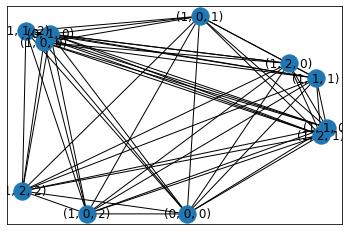

0 0


{'0': 0.0, '1': 0.0}

In [48]:
graph = decoder.make_error_graph('0 0  111 111 111')

for edge in graph['0'].edges:
    edge_info = graph['0'][edge[0]][edge[1]]
    print('For edge', edge, 'the weight is',edge_info['weight'])

nx.draw_networkx(graph['0'])
plt.plot()
plt.show()
print(decoder.matching('1 0  111 111 111'))
decoder.get_logical_prob(results)

In [55]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
import random

def get_noise(p_meas,p_gate):

    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

def get_raw_results(code,noise_model=None):

    circuits = code.get_circuit_list()
    raw_results = {}
    for log in range(2):
        job = execute( circuits[log], Aer.get_backend('qasm_simulator'), noise_model=noise_model)
        raw_results[str(log)] = job.result().get_counts(str(log))
    return raw_results

raw_results = get_raw_results(code, noise_model)
results = code.process_results( raw_results ) 
decoder.get_logical_prob(results)

{'0': 0.03125, '1': 0.0439453125}